
---
# **Proyecto Final Aprendizaje Automático 2021-2022**
---


##**Alumno 1** : Francisco Pertíñez Perea
##**Alumno 2** : Álvaro Santana Sánchez

##**Grupo**: A2


#**BBDD**: Cardiotocography

<img src="https://drive.google.com/uc?export=view&id=14m680B612TzlB7QpsKPwDVVomn-dYUxU">


<font color=red size=5>***1. Definición del problema a resolver y enfoque elegido. Identifique el uso de los datos en el
ajuste y valoración de resultados***</font>


- Información extraída del repositorio UCI:
http://archive.ics.uci.edu/ml/datasets/Cardiotocography


- **Descripción del problema**: 
  - El conjunto de datos consta de una serie de mediciones sobre
frecuencias cardiacas fetales y características de contracción uterina en un cardiograma. 
  - El objetivo es realizar una clasificación sobre el estado de los fetos a partir de dichas
características. La clasificación dentro del dataset ha sido realizada por obstetras expertos.

  - Se utilizará un enfoque de aprendizaje supervisado, ya que no existe un modelo establecido que ajustando los parámetros nos permita resolver el problema ( diseño ) y los elementos contienen etiquetas.


- **Conjunto de datos $X$**: 2126 instancias con 23 atributos
  - Información de los atributos:
    - LB - latidos por minuto
    - AC - aceleraciones por segundo
    - FM - movimientos fetales por segundo
    - UC - contracciones del útero por segundo
    - DL - desaceleraciones suaves por segundo
    - DS - deceleraciones fuertes por segundo -
    - DP - deceleraciones prolongadas por segundo
    - ASTV - porcentaje de tiempo con variabilidad anormal a corto plazo
    - MST - valor medio de la variabilidad a corto plazo
    - VALTV - porcentaje de tiempo con variabilidad anormal a largo plazo
    - MLTV - valor medio de la variabilidad a largo plazo
    - Width - ancho del histograma FHR
    - Min - Mínimo del histograma FHR
    - Max - Máximo del histograma FHR
    - Nmax - picos del histograma
    - Nzeros - ceros del histograma
    - Mode - modo del histograma
    - Mean -media del histograma
    - Median - mediana del histograma
    - Variance - varianza del histograma
    - Tendency - tendencia del histograma
    - CLASS - código del patrón de clase de FHR ( del 1 al 10 )
NSP - código del estado del feto (N=normal; S=sospechoso; P=patológico).

    - El resto de variables ( A , B , C... ) son patrones morfológicos con los que se realiza la
primera clasificación.


- **Conjunto de etiquetas $Y$**: Existen dos salidas posibles a la clasificación. 
  - La primera en un código de patrón de clase de FHR con 10 posibles valores. 
  - El segundo un código de estado que indica si un fetos se encuentra normal ( indicado con un 1 ), se tienen sospechas ( indicado con un 2 ) o contiene alguna patología ( indicado con un 3).   
  
  - Se debe escoger entre uno de los dos, luego **se trabajará con la clasificación NSP** debido a su facilidad de entendimiento.

- **Función de etiquetado $f$**: Es la función que trataremos de predecir y no conocemos, la
cual, dada un elemento determina si contiene alguna patología o puede ser sospechoso de
ella

------------------


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive') #Cargar datos del drive

#Leemos los datos con pandas
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/ProyectoFinal/CTG.csv',skip_blank_lines=True)
data = data.drop(0,axis=0)
#Eliminamos las columnas de datos no relevates
data = data.drop('FileName', axis=1)
data = data.drop('SegFile', axis=1)
data = data.drop('Date', axis=1)
data = data.drop('e', axis=1)
data = data.drop('b', axis=1)
data = data.drop('LBE', axis=1)
data = data.drop('CLASS', axis=1)
data = data.drop('DR', axis=1)
data = data.drop('A', axis=1)
data = data.drop('B', axis=1)
data = data.drop('C', axis=1)
data = data.drop('E', axis=1)
data = data.drop('AD', axis=1)
data = data.drop('DE', axis=1)
data = data.drop('LD', axis=1)
data = data.drop('FS', axis=1)
data = data.drop('SUSP', axis=1)

print('\n\033[1mConjunto de datos:\033[0m', 'CTG.csv')
print('\033[1mEjemplos en el dataset: \033[0m',data.shape[0])
print('\033[1mNúmero de características por ejemplo + etiqueta:\033[0m',data.shape[1])
print('\n\033[1mTipos de atributos utilizados:\033[0m \n',data.dtypes)


print(data)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Conjunto de datos: CTG.csv
Ejemplos en el dataset:  2126
Número de características por ejemplo + etiqueta: 23

Tipos de atributos utilizados: 
 LB          float64
AC          float64
FM          float64
UC          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
DL          float64
DS          float64
DP          float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
D           float64
NSP         float64
dtype: object
         LB   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS  ...    Max  \
1     120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  ...  126.0   
2     132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  ...  198.0   
3     133.0  2.0  0.0  5


**Creación de los datos de entrenamiento**:
Antes de realizar el análisis de los datos se debe de realizar una partición en training-test, la cuál será posteriormente utilizada para la estimación del error fuera de la muestra. Al
realizar previamente la división evitaremos el data-snooping el cuál podrá dar lugar a
modelos sesgados hacia nuestros datos y el problema no habrá sido abordado de manera
acertada. 

- Para la división tomaremos un 80% de los datos para training ( 1700 elementos )
y un 20% ( 426 elementos ) para test, los cuales son valores típicos. 

- El problema del conjunto de datos es que el número de ejemplos puede ser considerado bajo ( en torno a los 2000 ), pero debemos de establecer un compromiso entre usar menos datos para
entrenar y por tanto pagar la penalización en el modelo ajustado, o usar menos datos en el
conjunto de test y obtener una medición de error que sea menos representativa de aquello
que pasará fuera de la muestra . 

- Utilizando dichos valores, nuestro error de test generaliza según la siguiente cota, teniendo en cuenta que como se usa una sola hipótesis $|H| = 1$:
  - <font color=blue>$$E_{out}(h) \leq E_{test}(h) + \sqrt{\frac{1}{2N}log \frac{2|H|}{\delta}} $$</font>
    - Para una confianza del 96% ( $\delta = 0.04 $ ):
  - <font color=blue>$$E_{out}(h) \leq E_{test}(h) + 0.04465 $$</font>


**Función usada para la división:** usaremos la siguiente funcion que nos proporciona sklearn:

sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None,
random_state=None, shuffle=True, stratify=None)

- **Descripción de parámetros**:
  - *arrays : sequence of indexables with same length / shape[0]
Referido al conjunto de elementos y etiquetas.
  - test_size: float or int, default=None
Tamaño del test a usar. Permite números enteros o flotantes, estando esto últimos entre 0 y 1. Por tanto indicaremos que use el 20% de los datos para test con 0.2 .
  - training_size: float or int, default=None
Misma idea, para indicarle el 80% de los datos podemos usar un flotante 0.8. Con indicar
uno de los dos parámetros es suficiente.
  - random_state: int, RandomState instance or None, default=None
Permite controlar la mezcla aleatoria realizada antes de la partición de los datos. Siempre
que el entero pasado no cambie, en todas nuestras ejecuciones la mezcla será la misma.
  - shuffle: bool, default=True
Indica si dicha mezcla aleatoria se producirá o no. Usaremos el valor true ya que siempre es
buena idea mezclar nuestros datos aleatoriamente, además en muchos ficheros suelen
venir ordenados utilizando algún criterio, lo cuál trataremos de evitar.
  - stratify: array-like, default=None
Indica si los datos se dividirán de una manera estratificada en el conjunto indicado ( en
nuestro caso las clases ). Esto significa que si la distribución de etiquetas no está
compensada, es decir, existen muchos más ejemplos de una clase que de otra entonces se
distribuirán de forma que en un cross-validation de k-folds, los k-folds contengan una
proporción similar de ambas clases

In [ ]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#Separamos en un conjunto X de datos y un conjunto Y de etiquetas (columna y)
dataX = data.drop('NSP', axis=1)
dataY = data['NSP']

#Relizamos la separación en conjuntos de test y training
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size = 0.2, random_state = 45,stratify=dataY)
print('\033[1mPrimeros elementos del conjunto de entrenamiento:\033[0m ')
print(dataX.head())
print('\n\033[1mEtiquetas asociadas:\033[0m ')
print(dataY.head())
print('\n\033[1mTamaño final entrenamiento:\033[0m ', X_train.shape[0])
print('\033[1mTamaño final test:\033[0m ', X_test.shape[0])


Primeros elementos del conjunto de entrenamiento: 
      LB   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS  ...   Min    Max  \
1  120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  ...  62.0  126.0   
2  132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  ...  68.0  198.0   
3  133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  0.0  ...  68.0  198.0   
4  134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  0.0  ...  53.0  170.0   
5  132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  ...  53.0  170.0   

   Nmax  Nzeros   Mode   Mean  Median  Variance  Tendency    D  
1   2.0     0.0  120.0  137.0   121.0      73.0       1.0  0.0  
2   6.0     1.0  141.0  136.0   140.0      12.0       0.0  0.0  
3   5.0     1.0  141.0  135.0   138.0      13.0       0.0  0.0  
4  11.0     0.0  137.0  134.0   137.0      13.0       1.0  0.0  
5   9.0     0.0  137.0  136.0   138.0      11.0       1.0  0.0  

[5 rows x 22 columns]

Etiquetas asociadas: 
1    2.0
2    1.0
3    1.0
4    1.0
5 

**DESEQUILIBRIO DE CLASES**

En primera instancia vamos a medir la distribución de clases. Encontramos que en un 77.82% los ejemplos son referentes a la clase 1 ( fetos normales ), en un 13.88% fetos sospechosos y un 8.24% fetos que presentan patologías. Dicha distribución de etiquetas era esperada debido a la naturaleza del problema ( comúnmente la mayoría de fetos se desarrollan de una manera normal ), pero nos obliga a trabajar con desequilibrio lo cuál puede tener implicaciones en el modelo las cuales se irán comentando a lo largo del proyecto.

 FIG 1.1 FRECUENCIA DE LAS ETIQUETAS: 
 CLASE 1:  1323 -> 77.82352941176471 %
 CLASE 2:  236 -> 13.882352941176471 %
 CLASE 3:  141 -> 8.294117647058824 %


Text(0.5, 1.0, 'Distribución de clases')

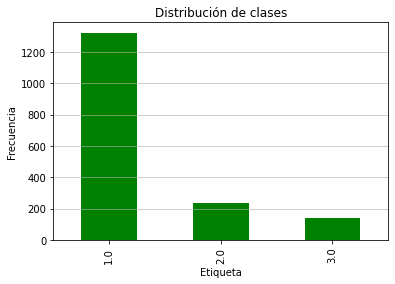

In [ ]:
#Medimos el porcentaje de etiquetas de cada tipo
etiquetasCount = y_train.value_counts()
print("\033[1m FIG 1.1 FRECUENCIA DE LAS ETIQUETAS:\033[0m ")
print("\033[1m CLASE 1:\033[0m ",etiquetasCount[1.0] , '->',100*etiquetasCount[1.0]/y_train.shape[0],'%')
print("\033[1m CLASE 2:\033[0m ",etiquetasCount[2.0], '->',100*etiquetasCount[2.0]/y_train.shape[0],'%')
print("\033[1m CLASE 3:\033[0m ",etiquetasCount[3.0], '->',100*etiquetasCount[3.0]/y_train.shape[0],'%')
etiquetasCount.plot(kind = "bar",color='green')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.title("Distribución de clases")


**ESTUDIO DE CORRELACIÓN ENTRE VARIABLES**:
 
Podemos realizar una matriz de correlación entre atributos, sin embargo su representación será difícil de interpretar debido a la alta cantidad de atributos. Por tanto lo que haremos será calcular dicha matriz siguiendo como criterio el coeficiente de correlación de Pearson y a partir de dicho coeficiente calcular el porcentaje de valores relaciones según los siguientes criterios:
 
- correlación total = 1 o -1: la relación es perfecta ya tenga pendiente positiva ( cuando una aumenta la otra también ) o negativa ( cuando una aumenta la otra disminuye )
 
- correlación nula = 0 : no existe ninguna relación
 
- correlación $\in$ (-0.5,0.5): asociación débil
 
- correlación $\in$ (0.5,0.8) $\cup$ (-0.8,-0.5): asociación moderada
 
- correlación $\in$ (0.8,1)  $\cup$ (-1,-0.8) : asociación fuerte
 
**Resultados:** Se aprecia que la mayoría de columnas tienen una asociación débil. Solo una pequeña cantidad de características cuenta con cierta relación moderada y otra pequeña cantidad de relaciones fuertes, las cuáles si pueden ser problemáticas a la hora del ajuste de nuestro modelo. Se observa también un porcentaje de atributos con relación total, los cuales podrían ser candidatos a unificarse, pero dicho porcentaje proviene de las correlaciones de cada atributo consigo mismo. Concluimos por tanto que cada columna contiene información propia que puede ser usada por el modelo para el aprendizaje, a expensas de algunos atributos cuyo coeficiente de pearson es superior a 0.8.
 
Referencia: https://likegeeks.com/python-correlation-matrix/

In [ ]:
import seaborn as sns
import numpy as np

#Calculamos la matriz de correlacion
correlation_mat = X_train.corr()
valores = ['nula','debil','moderada','fuerte','total']
altura = []

#Calculamos el porcentaje de cada clase
altura.append(100*len(np.where((correlation_mat == 0.0 ))[0])/(X_train.shape[1]*X_train.shape[1]))
altura.append((100*len(np.where(((correlation_mat < 0.5) & (correlation_mat > 0.0)) |  ((correlation_mat > -0.5) & (correlation_mat < 0.0)) )[0]))/(X_train.shape[1]*X_train.shape[1]))
altura.append((100*len(np.where(((correlation_mat >= 0.5) & (correlation_mat < 0.8)) |  ((correlation_mat <= -0.5) & (correlation_mat >= -0.8)) )[0]))/(X_train.shape[1]*X_train.shape[1]))
altura.append((100*len(np.where(((correlation_mat >= 0.8) & (correlation_mat < 1)) |  ((correlation_mat <= -0.8) & (correlation_mat >= -1)) )[0]))/(X_train.shape[1]*X_train.shape[1]))
altura.append((100*len(np.where((correlation_mat == 1 ) | (correlation_mat == -1))[0])/(X_train.shape[1]*X_train.shape[1])))

FIG 1.2: Porcentajes de correlación entre variables según el coeficiente pearson
El porcentaje de atributos con relación total es debido a atributos consigo mismos
Porcentaje de correlaciones totales :  4.545454545454546
Porcentaje de correlaciones de atributos medidas consigo mismo : 4.545454545454546




<BarContainer object of 5 artists>

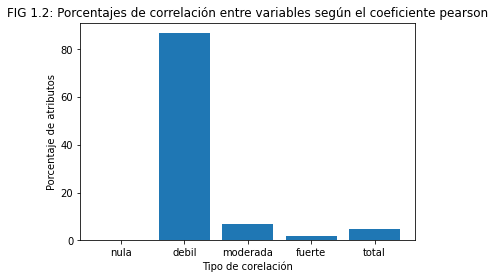

In [ ]:
print('\033[1mFIG 1.2: Porcentajes de correlación entre variables según el coeficiente pearson\033[0m')
print('El porcentaje de atributos con relación total es debido a atributos consigo mismos')
print('\033[1mPorcentaje de correlaciones totales : \033[0m',altura[4])
print('\033[1mPorcentaje de correlaciones de atributos medidas consigo mismo :\033[0m',100*(1/X_train.shape[1]))
print('\n')
plt.title('FIG 1.2: Porcentajes de correlación entre variables según el coeficiente pearson')
plt.xlabel('Tipo de corelación')
plt.ylabel('Porcentaje de atributos')
plt.bar(valores,altura)

**ESTUDIO DE LAS VARIABLES CONTINUAS**

Realizaremos un análisis de las variables continuas donde mediremos valores de media, máximo, mínimo , varianza y desviación típica. Podemos destacar de la figura 1.3 como algunas de las variables cuentan con una varianza muy pequeña. Esto puede implicar que contengan poca información a la hora del aprendizaje y podrían ser candidatos a eliminarse. Por otro lado se observa que existen diferentes rangos dentro de los atributos del problema. Por un lado FM recoge valores desde 557 a 0, siendo el valor con un máximo mayor, frente a por ejemplo DP cuyos valores de cero a cuatro. Esto pone de manifiesto la necesidad de una futura normalización de los datos, cuyas ventajas serán comentadas posteriormente.


In [ ]:
from tabulate import tabulate

#Guardamos cuales son los atributos continuos
atributosContinuos = np.where(X_train.dtypes != 'object')

nombreAtributoCont = []
media = []
Sx = []
maximo = []
minimo = []
var = []

#Calculamos los valores de cada columnas
for i in atributosContinuos[0]:
  nombreAtributoCont.append(X_train.columns[i])
  media.append(X_train[X_train.columns[i]].mean())
  maximo.append(X_train[X_train.columns[i]].max())
  minimo.append(X_train[X_train.columns[i]].min())
  var.append(X_train[X_train.columns[i]].var())
  Sx.append(X_train[X_train.columns[i]].std())


#________________________TABLA SOBRE VARIABLES CONTINUAS________________________
info = {'\033[1mAtributo\033[0m': nombreAtributoCont[:], 
        '\033[1mMedia\033[0m': media[:],
        '\033[1mMáximo\033[0m': maximo[:],
        '\033[1mMínimo\033[0m': minimo[:],
        '\033[1mVarianza\033[0m': var[:],
        '\033[1mDesviación estándar\033[0m': Sx[:]}
print("\033[1m"+'\nFIG 1.3 % TABLA VALORES DE LOS ATRIBUTOS CONTINUOS"'+"\033[0m")
print(tabulate(info, headers='keys', tablefmt='fancy_grid'))
print('\n')



FIG 1.3 % TABLA VALORES DE LOS ATRIBUTOS CONTINUOS"
╒════════════╤══════════════╤══════════╤══════════╤═══════════════╤═══════════════════════╕
│ Atributo   │        Media │   Máximo │   Mínimo │      Varianza │   Desviación estándar │
╞════════════╪══════════════╪══════════╪══════════╪═══════════════╪═══════════════════════╡
│ LB         │ 133.162      │    160   │    106   │   97.1108     │             9.85448   │
├────────────┼──────────────┼──────────┼──────────┼───────────────┼───────────────────────┤
│ AC         │   2.73647    │     26   │      0   │   12.6827     │             3.56128   │
├────────────┼──────────────┼──────────┼──────────┼───────────────┼───────────────────────┤
│ FM         │   7.30647    │    557   │      0   │ 1370.6        │            37.0216    │
├────────────┼──────────────┼──────────┼──────────┼───────────────┼───────────────────────┤
│ UC         │   3.64       │     23   │      0   │    8.04572    │             2.8365    │
├────────────┼─────────────

<font color=red size=5>***2. Codificación de los datos de entrada para hacerlos útiles a los algoritmos.***</font>

Debido a que todas las características con las que vamos a trabajar están en formato numérico (con el que ya puede trabajar el algoritmo) no haremos ninguna clase de codificación. Lo que sí haremos es una normalización de los datos, la cuál se explicará en su apartado correspondiente.

<font color=red size=5>**3. Valoración del interés de la variables medidas para el problema y selección de un subconjunto
(en su caso).**

Tal y como hemos explicado en el apartado 1, únicamente usaremos las características que son útiles para la clasificación que hemos elegido (NSP) de las dos opciones que teníamos, por tanto **eliminaremos todas las variables que no sean útiles en nuestro estudio**, estas son las referentes a los patrones morfológicos con los que se hace la otra clasificación. También encontramos variables con una correlación fuerte, las cuales pueden unificarse debido a que el comportamiento de una explica el de la otra y por tanto mantener ambas puede tener efectos negativos en nuestros modelo. Por último, hemos encontrado variables cuya varianza es muy baja y esto puede ser indicativo de que contienen poca información para el aprendizaje de nuestro modelo. Aún así no eliminaremos dichas variables debido a que en sus pequeñas variaciones pueden contener información esencial para las distinguir entre las clases más desbalanceadas. Para poder seleccionar un mejor conjunto de variables usaremos PCA, para lo cual previamente deben ser normalizados los datos.

<font color=red size=5>**4. Necesidad de la normalización de los datos e interés de la técnica usada (en su caso)**</font>

**Normalización de variables:** nos permitirá formar funciones de coste más uniformes, donde es más sencillo encontrar mínimos en un menor número de pasos. Para ello usaremos tanto la media de los datos de training como su varianza. También normalizamos los datos de test con dichos valores, si tomamos medidas también sobre este conjunto crearemos sesgo en nuestro modelo el cuál afectará a la medida de error out sample. 

- La normalización que usaremos será el standart escalable, el cual consiste en:
 
  - **Zero out mean:** Movemos el conjunto de elementos hasta que la media de estos sea cero.
 
      <font color=blue>$$\mu = \frac{1}{m} \sum^{m}_{i=1}{x^i}$$
              
      $$x = x - \mu$$</font>
 
  - **Normalize variance:** igualamos las varianzas de las variables siendo estas igual a uno.
  <font color=blue>$$\sigma ^2 = \frac{1}{m} \sum^{m}_{i=1}{(x^i)^2}$$

      $$ x = \frac{x}{\sigma ^2}$$</font>
 

- Su **implementación** en scikit learn:
 
  *class sklearn.preprocessing.StandardScaler(, copy=True, with_mean=True, with_std=True)

- **Descripción parámetros**:
 
  - copy : bool, default=True - realiza una copia sobre los datos
 
  - with_mean : bool, default=True - Mueve la media de los datos a cero.
 
  - with_std : bool, default=True - Unifica la varianza.
 
---
 
Referencia: https://www.youtube.com/watch?v=FDCfw-YqWTE

In [ ]:
from sklearn.preprocessing import StandardScaler

#Escalado estándar de variables
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(X_scaled_test, index=X_test.index, columns=X_test.columns)

In [ ]:
#Volvemos a medir los valores
media = []
Sx = []
maximo = []
minimo = []
var = []
indice = []

for i in nombreAtributoCont:
  media.append(X_train[i].mean())
  maximo.append(X_train[i].max())
  minimo.append(X_train[i].min())
  var.append(X_train[i].var())
  Sx.append(X_train[i].std())


#________________________TABLA SOBRE VARIABLES CONTINUAS________________________
info = {'\033[1mAtributo\033[0m': nombreAtributoCont[:], 
        '\033[1mMedia\033[0m': media[:],
        '\033[1mMáximo\033[0m': maximo[:],
        '\033[1mMínimo\033[0m': minimo[:],
        '\033[1mVarianza\033[0m': var[:],
        '\033[1mDesviación estándar\033[0m': Sx[:]}
print("\033[1m"+'\nTabla 4.1 VALORES DE LOS ATRIBUTOS NORMALIZADOS'+"\033[0m")
print("Se observa como la media vale cero y la varianza 1")
print(tabulate(info, headers='keys', tablefmt='fancy_grid'))
print('\n')



Tabla 4.1 VALORES DE LOS ATRIBUTOS NORMALIZADOS
Se observa como la media vale cero y la varianza 1
╒════════════╤══════════════╤══════════╤═══════════╤════════════╤═══════════════════════╕
│ Atributo   │        Media │   Máximo │    Mínimo │   Varianza │   Desviación estándar │
╞════════════╪══════════════╪══════════╪═══════════╪════════════╪═══════════════════════╡
│ LB         │  5.58507e-16 │  2.7242  │ -2.75716  │    1.00059 │               1.00029 │
├────────────┼──────────────┼──────────┼───────────┼────────────┼───────────────────────┤
│ AC         │  2.82127e-17 │  6.53427 │ -0.768621 │    1.00059 │               1.00029 │
├────────────┼──────────────┼──────────┼───────────┼────────────┼───────────────────────┤
│ FM         │  1.2539e-17  │ 14.8523  │ -0.197415 │    1.00059 │               1.00029 │
├────────────┼──────────────┼──────────┼───────────┼────────────┼───────────────────────┤
│ UC         │ -8.35933e-17 │  6.82733 │ -1.28365  │    1.00059 │               1.00029 │


---
**Reducción de variables PCA ( Principal Component Analysis)**:
PCA es una técnica utilizada para la reducción de variables especialmente útil cuando existe múltiple colinealidad entre variables ( como en nuestro caso ), las dimensiones de entrada son demasiado grandes, o para realizar compresión en los datos y reducir el ruido.
El análisis realizado por PCA es el siguiente:
- Los datos de entrada deben son z-scored, de tal forma que cada variable tiene media cero y desviación estándar unitaria ( paso anterior ).
- Se realiza la construcción y descomposición de valores propios de la matriz de covarianzas ( al ser la desviación estándar de todas las características 1, la covarianza es igual a la matriz de correlación )
- Los valores propios se ordenan en orden decreciente respecto la varianza en los datos
- Finalmente se realiza una proyección de los datos en el espacio reducido de PCA obtenido al multiplicar ( dot product ) los datos originales normalizados por los valores propios líderes de la matriz de covarianza.
- El espacio nuevo de PCA maximiza la varianza original de los datos.
La idea principal por tanto de PCA es la creación de los "componentes principales", los cuales son nuevas variables construidas como combinaciones lineales o mezclas de las variables principales. Estas combinaciones están hechas de manera que las nuevas variables están incorrelacionadas y la mayoría de información de las variables iniciales se comprime en estos componentes.

**¿Cual es el número máximo de componente relevantes?**

Debido al rango de la matriz de covarianzas, podemos obtener con PCA una cota superior de valores significativos. La matriz de covarianzas tendrá la forma nºelementos x nºcaracterísticas, luego el máximo rango será el mínimo entre ambas. Por ende podemos tener como mucho dicho valor de componentes significativas ( esto es poco relevante en nuestro problema, ya que acota el número de componentes significativas al número de variables del problema ).
¿Cómo elegimos entonces el número de componentes?
No es necesario elegir un número de componentes para la nueva matriz de datos de manera manual, indicamos al modelo que debe mantener una varianza explicada por los componentes generados del 99%, de esta manera nos aseguramos que el modelo siga manteniendo toda la información.
 
---
 
Implementación de PCA:
 
**class sklearn.decomposition.PCA**(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 
- n_components: int, float or ‘mle’, default=None
 
Al usar un flotante indicamos la cantidad de varianza explicada por los datos a mantener. Con un valor alto como 99% nuestro modelo conserva la información.
 
- copy: bool, default=True
 
No sobreescribe los datos.
 
- whiten : bool, default=False
 
Asegura outputs incorrelados con varianza en las anchuras de los componente unitarias. Puede perder información luego se queda en false.
 
- svd_solver: {‘auto’, ‘full’, ‘arpack’, ‘randomized’}, default=’auto’
 
El valor auto selecciona el mejor solucionador dependiendo de X.shape y el número de componentes.
 
- tol : float, default=0.0
 
Tolerancia a valores singulares. Solo interesante si solver ='arpack'
 
- iterated_power: int or ‘auto’, default=’auto’
 
Iteraciones en el método usado por el solver = 'randomized'
 
- n_oversamples: int, default=10
 
Número adicional de vectores aleatorio usado por el solver = 'randomized'
 
- power_iteration_normalizer: {‘auto’, ‘QR’, ‘LU’, ‘none’}, default=’auto’
 
Normalizador del poder de cada iteración
 
- random_state: int, RandomState instance or None, default=None
 
Semilla en los casos de 'arpack' y 'randomized'
 
---
Referencia 1: https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

Referencia 2: https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
 
 





In [ ]:
from sklearn.decomposition import PCA

print('\033[1mNúmero de características antes de la transformación: \033[0m')
print(X_train.shape[1])

pca = PCA(n_components = 0.99)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print('\033[1mNúmero de características después de la transformación: \033[0m')
print(X_train.shape[1])

Número de características antes de la transformación: 
22
Número de características después de la transformación: 
18


 FIG 4.2:  Eleccion de componentes de PCA  
Observamos como con solo 18 características podemos mantener toda la información en nuestro modelo


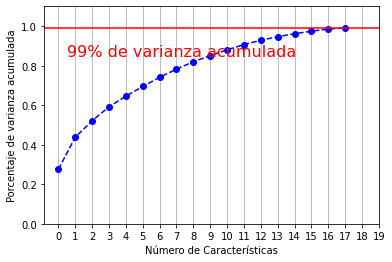

In [ ]:
#Gráfica adaptada del enlace

print('\033[1m FIG 4.2:  Eleccion de componentes de PCA \033[0m ')
print('Observamos como con solo 18 características podemos mantener toda la información en nuestro modelo')

fig, ax = plt.subplots()
xi = np.arange(0, 18, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Número de Características')
plt.xticks(np.arange(0, 20, step=1))
plt.ylabel('Porcentaje de varianza acumulada')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% de varianza acumulada', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
import seaborn as sns
import numpy as np

#Calculamos la matriz de correlacion
correlation_mat = X_train.corr()
valores = ['nula','debil','moderada','fuerte','total']
altura = []

#Calculamos el porcentaje de cada clase
altura.append(100*len(np.where((correlation_mat == 0.0 ))[0])/(X_train.shape[1]*X_train.shape[1]))
altura.append((100*len(np.where(((correlation_mat < 0.5) & (correlation_mat > 0.0)) |  ((correlation_mat > -0.5) & (correlation_mat < 0.0)) )[0]))/(X_train.shape[1]*X_train.shape[1]))
altura.append((100*len(np.where(((correlation_mat >= 0.5) & (correlation_mat < 0.8)) |  ((correlation_mat <= -0.5) & (correlation_mat >= -0.8)) )[0]))/(X_train.shape[1]*X_train.shape[1]))
altura.append((100*len(np.where(((correlation_mat >= 0.8) & (correlation_mat < 1)) |  ((correlation_mat <= -0.8) & (correlation_mat >= -1)) )[0]))/(X_train.shape[1]*X_train.shape[1]))
altura.append((100*len(np.where((correlation_mat == 1 ) | (correlation_mat == -1))[0])/(X_train.shape[1]*X_train.shape[1])))

**PCA Y REDUCCIÓN DE LA CORRELACIÓN**

Observamos en la figura 4 como tras aplicar PCA, hemos logrado que todas la variables tengan una correlación débil, conteniendo cada una de ellas información relevante para el modelo. 

FIG 4.3: Porcentajes de correlación entre variables según el coeficiente pearson TRAS PCA
El porcentaje de atributos con relación total es debido a atributos consigo mismos
Porcentaje de correlaciones totales :  5.555555555555555
Porcentaje de correlaciones de atributos medidas consigo mismo : 5.555555555555555




<BarContainer object of 5 artists>

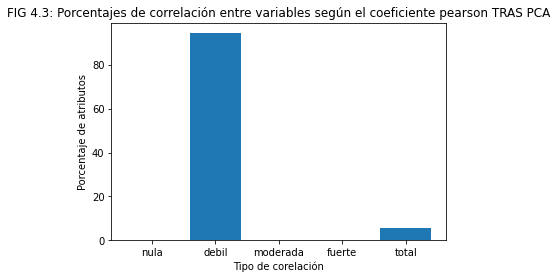

In [ ]:
print('\033[1mFIG 4.3: Porcentajes de correlación entre variables según el coeficiente pearson TRAS PCA\033[0m')
print('El porcentaje de atributos con relación total es debido a atributos consigo mismos')
print('\033[1mPorcentaje de correlaciones totales : \033[0m',altura[4])
print('\033[1mPorcentaje de correlaciones de atributos medidas consigo mismo :\033[0m',100*(1/X_train.shape[1]))
print('\n')
plt.title('FIG 4.3: Porcentajes de correlación entre variables según el coeficiente pearson TRAS PCA')
plt.xlabel('Tipo de corelación')
plt.ylabel('Porcentaje de atributos')
plt.bar(valores,altura)

<font color=red size=5>5/6. Interés y justificación de la función/es de pérdida usada / Argumentos a favor de la idoneidad de los modelos seleccionados para la BBDD.</font>

**MODELOS CONSIDERADOS**

**Modelos Lineales** 

- El problema consiste en una clasificación de tres clases, por tanto, conjuntos de hipótesis
como perceptrón o regresión no parecen interesantes para este problema. Además
debemos considerar que el dataset contiene pocos ejemplos y que modelos como el
perceptrón multicapa pueden ser penalizados. 

- Por tanto los modelos escogidos para el
problema son:

    - **Regresión logística ( modelo lineal )**: este modelo es fácilmente extendible para
problemas con múltiples clases, por ejemplo mediante el uso de one-vs-rest
transformando el problema en un problema múltiple de clasificación binaria. 
      
      - La función de pérdida por tanto será la entropía cruzada y cambiaremos la función de
probabilidad predecida por un función de distribución de probabilidad multinomial.
Aporta una medida de cómo de indicado es un predictor para cada una de las clases
y obtiene una buena predicción en conjuntos de datos sencillos especialmente
cuando son linealmente separables.

**Modelos No Lineales**:

  - Dado que sólo podíamos elegir entre Perceptrón Multicapa, Random Forest y SVM argumentaremos el por qué de que hayamos elegido SVM y Random Forest sobre Perceptrón Multicapa.


  - SVM vs Perceptrón Multicapa: para compararlos debemos entender SVM como un problema de regularización. En este contexto, el análisis comparativo se centra en la función de perdida usada por cada uno de ellos, ya que el término de regularización es común a todos ellos, este es minimizar la norma del vector de pesos.

      - Caso Separable: En este caso SVM alcanza la solución óptima en términos de menor dimensión VC, ya que su función de pérdidas busca el hiperplano solución con máxima anchura entre clases. La función de Perceptrón Multicapa solo busca una solución separable.

      - Caso No Separable: SVM nos permite a través de la constante C del término de penalización de errores elegir un compromiso entre error y generalización. Para cada valor de C la solución de SVM es óptima ya que maximiza la separabilidad entre clases, por el contrario Perceptrón Multicapca no dispone de dichos mecanismos de compromiso y por tanto sus soluciones  no tienen garantías de optimalidad o de encontrar una solución aceptable.

  - Random Forest vs Perceptrón Multicapa: el por qué de la elección de Random Forest sobre Perceptrón Multicapa es que Random Forest nos permite obtener un compromiso sesgo-varianza a diferencia de Perceptron Multicapa que tiende a tener un alto overfit (cosa contra la que puede luchar Random Forest gracias a la poda de nodos) y por tanto una mala generalización, necesitaríamos de una gran cantidad de datos para hacer Perceptrón Multicapa una opción factible, y en vista de que tenemos aproximadamente 2000 datos no parece una cantidad aceptable.

<font color=red size=5>7. Argumentar sobre la idoneidad de la regularización usada (en su caso)</font>

- Al entrenar los pesos sobre un determinado conjunto de entrenamiento, es posible que nos
adheramos tanto a la muestra que se produzca sobre entrenamiento en las solución. Dicho
sobre entrenamiento se produce mediante un crecimiento de los pesos, lo cual es posible
combatir mediante la regularización. Mediante esta técnica, podemos utilizar una clase de
funciones grande, y mediante la limitación sobre los pesos tratar de impedir que el modelo
saque aprendizaje del ruido estocástico, o que el modelo se centre excesivamente en el
ajuste de los datos y como resultado la hipótesis final tenga una complejidad mayor a los
propios datos, haciendo que el ruido determinístico aumente.

- Existen diversas técnicas para regularizar, todas ellas basadas en añadir restricciones sobre
los pesos en nuestro problema de aprendizaje ( usualmente una función positiva de los
pesos debe ser acotada por un valor C, aunque pueden ser restricciones más duras como
obligar a un cierto número de pesos a ser nulos ). Conocer qué regularización es mejor para
un determinado problema no es algo sencillo, pero en líneas generales la regularización ,
siempre que no se le de un peso excesivo, suele mejorar los resultados de nuestros
modelos.

- Nos centraremos en las regularizaciones más típicas, que son aquellas que vienen
implementadas en scikit learn: **l1 y l2**. El efecto de ambas regularizaciones , en esencia, es
similar. La diferencia entre ambas es debido a su forma de actuar por como están definidas.

  - Por un lado **L1** hace tender a los coeficientes hacia valores cercanos a cero, debido a que
acota la sumatoria de valores absolutos de los pesos:
<font color=blue>$$\sum_{q=0}^Q |w_q| \leq C$$</font>

  - **L2** por el otro , tiende a reducir los coeficientes de manera uniforme, ya que utiliza la suma
de los valores cuadrados:
<font color=blue>$$\sum_{q=0}^Q w_q^2 \leq C$$</font>

  - Podemos considerar por tanto, que normalmente **L1 es útil para la selección de variables**,
ya que permite acercarlas más a cero, mientras que **L2 es útil cuando existen
características codependientes**. En el análisis de datos no se han encontrado
codependencias, por tanto la regularización escogida será L1.

- Una vez establecido el tipo de regularización, debemos establecer qué peso se da a dicha
regularización. Según hemos explicado, cuanto mayor sea C, más libertad tendrá el modelo
para hacer crecer los pesos y por tanto menor valor de regularización tendrá. La elección de
C, de forma similar a como pasaba con el learning rate, no es una tarea sencilla ni existe un
valor teórico. En la práctica, suelen tomar distintos valores de C y medir los diferentes el
rendimiento de los diferentes modelos con dichos valores mediante cross-validation.

- Por tanto la mejor opción parece utilizar un GridSearch, el cual es un estimador de
parámetros de scikit-learn, que realizará un cross-validation con distintos parámetros para
estimar los mejores de ellos.



<font color=red size=5>8. Algoritmo de aprendizaje usado en cada modelo, especificando y justificando los valores de
todos los parámetros e hiperparámetros usados.</font>

- **Regresion Logística:**

  - class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001,
C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None,
solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False,
n_jobs=None, l1_ratio=None):

  - **Descripción y justificación de parámetros:**
    
    - penalty: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’ - Tipo de regularización escogida, se utilizará l1 como se comentó al utilizar la
regularización.

    - dual: bool, default=False - Permite la formulación dual en el caso de que utilicemos la regularización l2. Lo
dejamos a false, ya que aunque el problema dual puede ser más fácil de solucionar,
da problemas con el cálculo de hiperparámetros en gridSearch.

    - tol: float, default=1e-4 - Tolerancia del criterio de parada. Se tomará el valor por defecto.

    - C: float, default=1.0 - Inversa de la fuerza a aplicar sobre la regularización. Cuanto menor valor tomemos, tendremos una regularización más fuerte. Se calcula mediante GrindSearch.

    - fit_interceptbool, default=True - Si se debe añadir un sesgo a la función de decisión. Sabemos que en ocasiones podemos aumentar ligeramente el sesgo y disminuir significativamente la varianza.

    - intercept_scaling: float, default=1 - Para modificar el sesgo, añade una característica sintética al resto de instancias,
aunque su efecto puede verse decrementado durante la regularización.

    - class_weight: dict or ‘balanced’, default=None - Usaremos pesos balanceados como se comentó en el apartado de modelos y
funciones de pérdida.

    - solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ - Usaremos lib-linear ya que se presenta una buena elección solo que un poco más lenta que sus competidores. Además permite regularización tanto l1 como l2.

    - max_iter: int, default=100 - Máximo número de iteraciones posibles hasta converger: En principio 100 iteraciones parece un número bajo respecto a las implementaciones realizadas en
prácticas anteriores. Es preferible tener un número grande de iteraciones y dejar que
el algoritmo pare mediante el criterio de parada prematura.

    - multi_class {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’ - Para usar liblinear se necesita de ovr.

    - verbose: int, default=0 - Expresividad de los algoritmos de resolución. No nos interesa demasiado, la podemos dejar a cero.

    - warm_start: bool, default=False - Inicializa mediante los resultados finales de llamadas anteriores a la función.

    - n_jobs: int, default=None - Para llevar a cabo una paralelización sobre las clases.

    - l1_ratio: float, default=None - Solo usaremos regularización l1 y por tanto este parámetro no es relevante.

--------------------------------
- **Support Vector Machine (SVC):**

  - class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

  - **Descripción y justificación de parámetros**:

    - C float, default=1.0 - Inversa de la fuerza a aplicar sobre la regularización. Cuanto menor valor tomemos,
tendremos una regularización más fuerte. Se calcula mediante GrindSearch.
      
    - kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’ - Especifica el kernel a utilizar. Esta es una función que permite calcular directamente el
producto escalar de los elementos transformados de la matriz en el problema de
optimización resuelto, sin tener que aplicar la transformación sobre los datos. Probaremos
transformaciones polinómicas sobre los datos y por tanto usaremos el kernel polinomial
‘poly’.

    - degree int, default=3 - Para el kernel poly, indica el grado del polinomio en la transformación. Cuanto mayor sea el
valor del polinomio mayor capacidad tendrá nuestro modelo de ajustar los datos, pero
polinomios de grado alto pueden provocar un gran sobreajuste en los datos. Por tanto
probaremos dicho kernel con polinomios de hasta grado 3, usando el valor por defecto.

    - gamma{‘scale’, ‘auto’} or float, default=’scale’ - Coeficiente del kernel.
Usaremos el valor por defecto scale, ya que usa la varianza de los datos siguiendo la
fórmula : 1 / (n_features * X.var())

   - coef0 float, default=0.0 - Término independiente que se añade al polinomio. Usaremos el valor por defecto (nulo) ya
que no tenemos garantías de que algún valor de coeficiente pueda funcionar mejor.

    - shrinking bool, default=True - La heurística shrinking, permite acortar el tiempo de entrenamiento cuando el número de
iteraciones es grande. Como no buscamos rendimiento en el ajuste del modelo, lo
estableceremos a False ya que puede empeorar los resultados.

    - probability bool, default=False - Uso de estimaciones probabilísticas. No tenemos garantía de que pueda ser interesante de
cara a nuestro problema, por tanto se mantendrá a false.

    - tol float, default=1e-3 - Tolerancia de cara al criterio de parada. Mantenemos el valor por defecto.

    - cache_size float, default=200 - No afecta al rendimiento, por lo que se mantiene el valor por defecto.

    - class_weight dict or ‘balanced’, default=None - Se usará a balanced como se especificó anteriormente en el apartado de modelos y
funciones de pérdida.

    - verbose bool, default=False - Expresividad de la salida. No afecta al rendimiento.

    - max_iter: int, default=-1 - Se mantiene a -1 ya que no existen restricciones de rendimiento, y con este valor se permite
al algoritmo converger hasta que encuentre una solución deseada.

    - decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’ - Usaremos One-vs-Rest ya que divide el problema de clasificación multiclase en un
problema de clasificación binaria por clase, mientras que One-vs-One utiliza un problema de
clasificación binaria por cada pareja de clases.

    - break_ties bool, default=False - Mantenemos a false ya que reduce el coste computacional debido a que de esta manera
maneja los empates dando un ganador a una de las clases por defecto.

    - random_state int, RandomState instance or None, default=None - Controla el número aleatorio en la generación de mezclas, división de batch

-------------------------------------------------------

- **Random Forest:**
  - class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

  - **Descripción y justificación de los parámetros:** Según las indicaciones del profesor, salvo el número de árboles, los demás parámetros usaremos los valores por defecto que se dan en teoría.
  
    - n_estimators int, default=100 - Representa el número de arboles que generará el algoritmo. Experimentaremos para encontrar el valor correcto.

    - criterion{“gini”, “entropy”, “log_loss”}, default=”gini” - determina la función que mide la calidad de la partición. Existen los criterios “gini”, “log_loss” y “entropy”. Este parámetro es específico de los árboles. Usaremos el valor por defecto.

    - max_depth int, default=None - Profundidad máxima del arbol. Si se deja a None los nodos son expandidos hasta que todas las hojas sean puras o hasta que contenga menos de min_samples_split muestras. lo dejaremos por defecto

    - min_samples_split int or float, default=2 - Número mínimo de muestras requerido para particionar un nodo interno.
      - Si vale int, entonces se considera min_samples_split como el mínimo número
      - Si vale float, entonces min_samples_split es una fracción y ceil(min_samples_split * n_samples)  es el mínimo número de muestras para cada partición.
      - Usaremos el valor por defecto.

    - min_samples_leafint or float, default=1 - Número mínimo de muestras requeridas para ser un nodo hoja. Cuanto mayor sea este valor obtendremos una mayor generalización, y por el contrario, cuanto menor sea este valor mayor  será el sobreajuste pero encontrará mayores dificutades de dividir la muestra. Lo dejaremos por defecto

    - min_weight_fraction_leaffloat, default=0.0 - Fracción de peso mínimo  de la suma total de pesos (de todas las muestras de entrada) requerido en un nodo hoja. Lo dejaremos por defecto. 

    - max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt” - Número de características a cosiderar a la hora de buscar la mejor partición. Utilizaremos el valor por defecto, “sqrt” que es el que se usa en general.

    - max_leaf_nodesint, default=None - Número máximo de nodos hoja.

    - min_impurity_decreasefloat, default=0.0 - Un nodo sera partido si esa partición induce a un decrecimiento de la impureza mayor o igual que este valor.
Usaremos el valor por defecto.

    - bootstrap bool, default=True - Decide si se permite ajustar árboles a partir de muestras ya muestreadas. Dejaremos el valor por defecto.

    - oob_scorebool, default=False - Determina si se usarán las muestras que aún no se han muestreado para estimar la puntuación de generalización. Usaremos el valor por defecto.

    - n_jobsint, default=None - Ya que este parámetro afecta a rendimiento es irrelevante.

    - random_state int, RandomState instance or None, default=None - Controla tanto la aleatoriedad a la hora de bootstrapping las muestras cuando construimos árboles de decisión, como para la elección de las características a cosiderar cuando buscamos la mejor partición para cada nodo.

    - verbose int, default=0 - Controla la expresividad del algoritmo. Lo dejamos a 0 pues es irrelevante.

    - warm_start bool, default=False - Reusa la solución de la llamada previa para ajustar y añadir más estimadores. Si está a falso ajusta un completamente nuevo bosque.

    - class_weight{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None - Ajuste de los pesos a cada clase. Se usará a balanced como se especificó anteriormente en el apartado de modelos y
funciones de pérdida.

    - ccp_alpha non-negative float, default=0.0 - Configura el valor mínimo de complejidad que determina cuando se realiza una poda de hojas, cuanto mayor sea el valor mayor será el número de nodos podados. Lo dejaremos por defecto.

    - max_samples int or float, default=None - Número máximo de muestras. Lo dejaremos por defecto.


---

<font color=red size=5>9. Selección de la mejor hipótesis. Justifique la técnica usada y calcule el error Eout de dicha
hipótesis.</font>
 
Una vez establecidos los hiperparámetros, deberemos de escoger un modelo.
 
Según lo acordado, utilizaremos un error de validación medio para la elección del modelo. Para ello lo que haremos será medir los errores de validación mediante 5-cross-validation y realizar una media.
 
$$ E_{cv} = \frac{1}{5} \sum_{i=1}^5 E_{val}(g_i^-)$$
 
Al escoger la hipótesis con mejor error de cross-validation, dicho error no podrá considerarse insesgado, pues los hemos utilizado para elegir el modelo ( será un error optimista ). Por tanto una vez tomada la validación para escoger un modelo, entrenaremos con todos los datos de training, y mediremos el error fuera de la muestra a partir del conjunto de test separado previamente, siendo este un error menos.
 
 
---
 
**class sklearn.model_selection.GridSearchCV**(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 
- estimator: estimator object
 
estimador para el cual se ajustan los hiperparámetros
 
- param_grid: dict or list of dictionaries
 
Parámetros a probar por GridSearch.
 
- scoring: str, callable, list, tuple or dict, default=None
 
Estrategia para medir el rendimiento de los diferentes cross-validation. Lo mantendremos a no, y usaremos la función de pérdida de cada modelo.
 
- n_jobs: int, default=None
 
No afecta a los resultados del modelo
 
- refit: bool, str, or callable, default=True
 
Lo mantendremos a true para que reajuste el estimador con los mejores hiperparámetros encontrados hasta el momento.
 
- cv: int, cross-validation generator or an iterable, default=None
 
Estrategia de cross-validation a utilizar. Si lo mantenemos a none se utilizará un 5-cross-validation, lo cual es suficiente en nuestro caso para estimar el mejor de los modelos.
 
- verbose: int
 
No afecta a los resultados de la función. Información devuelta por la función.
 
- pre_dispatch: int, or str, default=’2*n_jobs’
 
Controla el número de trabajos que enviados durante la ejecución en paralelo. No afecta al rendimiento.
 
- error_score: ‘raise’ or numeric, default=np.nan
 
Valor que se asigna al score en el caso de que ocurra un error, por ejemplo, que dos parámetros no sean compatibles.
 
- return_train_score: bool, default=False
 
Devuelve en los scores el valor de training, aunque el que nos interesa es el error de cross-validation.
 
---
 
Compararemos nuestros modelos mediante el uso de cross-validation, donde mediremos una vez escogemos los mejores hiperparámetros de cada modelo, el mejor rendimiento de cada uno de ellos según las diferentes métricas de error.
 



**MÉTRICAS DE ERROR**

El desbalance de clases supone un problema a la hora de medir el buen funcionamiento de un modelo. Por ejemplo, si nos fijamos en el accuracy en un modelo que nos diga la clase más frecuente ( no podemos considerar que dicho modelo haya realizado un aprendizaje ) podemos obtener porcentajes altos , en nuestro caso cercanos al 80%. Según la naturaleza del proyecto podemos estipular cuál es la prioridad de cada uno de los objetivos a alcanzar. En este caso el coste de un fallo puede tener consecuencias más o menos significativas dependiendo de este. De esta forma establecemos los siguientes objetivos:

1. Detectar los fetos que contienen patologías: debido al riesgo que pueden presentar estas para el feto, es lo más importante a detectar para que estas puedan ser tratadas a tiempo de cara a la salud del mismo.

2. Detectar los fetos sospechosos: si algún feto puede ser sospechoso de enfermedad, es interesante detectar esto a tiempo para la realización de más pruebas en un futuro que puedan detectar posibles problemas en el mismo.

  - Para ellos mediremos la **sensitivity:** porcentaje de elementos con etiqueta "si" que fueron bien clasificados. Implementada en scikit-learn como recall.
$$ \frac{TruePositive}{True Positive + FalseNegative } $$
 
3. También será interesante un buen porcentaje de accuracy en el modelo. Aunque puede considerarse un objetivo secundario, también es importante que por ejemplo a un feto normal o sospechoso no se le detecte directamente como una patología, ya que aunque no tiene consecuencias tan negativas como el caso contrario, no es deseable que nuestro modelo cometa este tipo de errores. Puede ser usado como criterio de desempate. Para ello podemos usar
 
  - **Accuracy:** porcentaje de elementos bien clasificados. 
 
$$ \frac{TrueNegative + TrueNegative}{ TrueNegative + TruePositive + FalseNegative + FalsePositive} $$

  - **balanced accuracy**: realiza una estimación del recall medio en cada clase
 




In [ ]:
'''
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01)
yhat = iso.fit_predict(X_train)

#valores con los que nos quedamos
mask = yhat != -1
print(mask)
print("\033[1mTamaño del dataset antes de eliminar outliers\033[0m")
print(X_train.shape)
#X_train = X_train.drop(df.index(mask),axis=0)
X_train, y_train = X_train.loc[mask, :], y_train.loc[mask]
#y_train = y_train.drop(mask[0][:],axis=0)
print("\033[1mTamaño del dataset depués de eliminar outliers\033[0m")
print(X_train.shape)
'''

'\nfrom sklearn.ensemble import IsolationForest\n\niso = IsolationForest(contamination=0.01)\nyhat = iso.fit_predict(X_train)\n\n#valores con los que nos quedamos\nmask = yhat != -1\nprint(mask)\nprint("\x1bTamaño del dataset antes de eliminar outliers\x1b")\nprint(X_train.shape)\n#X_train = X_train.drop(df.index(mask),axis=0)\nX_train, y_train = X_train.loc[mask, :], y_train.loc[mask]\n#y_train = y_train.drop(mask[0][:],axis=0)\nprint("\x1bTamaño del dataset depués de eliminar outliers\x1b")\nprint(X_train.shape)\n'

In [ ]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()


In [ ]:
#Funcion que mide la media en los valores de una lista
#https://www.geeksforgeeks.org/find-average-list-python/
def average(lst):
    return sum(lst) / len(lst)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings("ignore")



cross_balanced = LogisticRegression(random_state=0,max_iter=40000,class_weight='balanced',penalty='l1',solver='liblinear')
 
parameters = {
   'C':[0.1,0.4,0.6,0.75,0.8,0.9,0.95,1,1.2,1.4,1.7,2]
}
#Calculamos el estimador según el mejor de los hiperparámetros
clf = GridSearchCV(cross_balanced, parameters,refit='recall')
clf.fit(X_train,y_train)

print("\033[1m HIPERPARÁMETROS ESCOGIDOS RIDGE\033[0m \n")
print(clf.best_params_)





 HIPERPARÁMETROS ESCOGIDOS RIDGE 

{'C': 0.4}


In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
parametros1 = clf.cv_results_
scoring=['recall','balanced_accuracy','precision','accuracy','f1']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

LR_accu = []
LR_balanced = []
LR_recall_suspect = []
LR_recall_pathologic = []
  
for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train[train_index],  X_train[test_index]
    y_train_fold, y_test_fold =  y_train[train_index],  y_train[test_index]
    clf.fit(x_train_fold, y_train_fold)
    y_pred = clf.predict(x_test_fold)
    LR_balanced.append(balanced_accuracy_score(y_test_fold, y_pred))
    LR_recall_suspect.append(recall_score(y_test_fold, y_pred,labels=[2.0], average='micro'))
    LR_recall_pathologic.append(recall_score(y_test_fold, y_pred,labels=[3.0], average='micro'))
    LR_accu.append(accuracy_score(y_test_fold, y_pred))
    
   

In [ ]:
print("\033[1m--REGRESIÓN LOGISTICA--\033[0m")

print("\033[1mBALANCED ACCURACY\033[0m")
print( average(LR_balanced) )
print("\033[1mSUSPECT RECALL\033[0m")
print( average(LR_recall_suspect) )
print("\033[1mPATHOLOGIC RECALL\033[0m")
print( average(LR_recall_pathologic))
print("\033[1mACCURACY\033[0m")
print( average(LR_accu))


--REGRESIÓN LOGISTICA--
BALANCED ACCURACY
0.8144256003705193
SUSPECT RECALL
0.7581560283687944
PATHOLOGIC RECALL
0.7660098522167488
ACCURACY
0.8841176470588235


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rForest = RandomForestClassifier(random_state=0,class_weight='balanced')

parameters = {
   'n_estimators':[50,75,100,125,150,175,200]
}

rForest = GridSearchCV(rForest, parameters)
rForest.fit(X_train,y_train)

print("\033[1m HIPERPARÁMETROS ESCOGIDOS RANDOMFOREST\033[0m \n")
print(rForest.best_params_)



 HIPERPARÁMETROS ESCOGIDOS RANDOMFOREST 

{'n_estimators': 50}


In [ ]:
rF_accu = []
rF_balanced = []
rF_recall_suspect = []
rF_recall_pathologic = []

for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train[train_index],  X_train[test_index]
    y_train_fold, y_test_fold =  y_train[train_index],  y_train[test_index]
    rForest.fit(x_train_fold, y_train_fold)
    y_pred = rForest.predict(x_test_fold)
    rF_balanced.append(balanced_accuracy_score(y_test_fold, y_pred))
    rF_recall_suspect.append(recall_score(y_test_fold, y_pred,labels=[2.0], average='micro'))
    rF_recall_pathologic.append(recall_score(y_test_fold, y_pred,labels=[3.0], average='micro'))
    rF_accu.append(accuracy_score(y_test_fold, y_pred))
    

In [ ]:
print("\033[1m--RANDOM FOREST--\033[0m")

print("\033[1mBALANCED ACCURACY\033[0m")
print( average(rF_balanced) )
print("\033[1mSUSPECT RECALL\033[0m")
print( average(rF_recall_suspect) )
print("\033[1mPATHOLOGIC RECALL\033[0m")
print( average(rF_recall_pathologic))
print("\033[1mACCURACY\033[0m")
print( average(rF_accu))

--RANDOM FOREST--
BALANCED ACCURACY
0.7653729427331637
SUSPECT RECALL
0.5418439716312057
PATHOLOGIC RECALL
0.7724137931034483
ACCURACY
0.9035294117647059


In [ ]:
from sklearn.svm import SVC

svc = SVC(gamma='auto',class_weight='balanced',kernel='poly')
parameters = {
     'C':[0.1,0.4,0.6,0.75,0.8,0.9,0.95,1,1.2,1.4,1.7,2],
}
svc = GridSearchCV(svc, parameters)
svc.fit(X_train,y_train)


print("\033[1m HIPERPARÁMETROS ESCOGIDOS SVC\033[0m \n")
print(svc.best_params_)

 HIPERPARÁMETROS ESCOGIDOS SVC 

{'C': 2}


In [ ]:
svm_accu = []
svm_balanced = []
svm_recall_suspect = []
svm_recall_pathologic = []

for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train[train_index],  X_train[test_index]
    y_train_fold, y_test_fold =  y_train[train_index],  y_train[test_index]
    svc.fit(x_train_fold, y_train_fold)
    y_pred = svc.predict(x_test_fold)
    svm_balanced.append(balanced_accuracy_score(y_test_fold, y_pred))
    svm_recall_suspect.append(recall_score(y_test_fold, y_pred,labels=[2.0], average='micro'))
    svm_recall_pathologic.append(recall_score(y_test_fold, y_pred,labels=[3.0], average='micro'))
    svm_accu.append(accuracy_score(y_test_fold, y_pred))

In [ ]:
print("\033[1m--SVM--\033[0m")

print("\033[1mBALANCED ACCURACY\033[0m")
print( average(svm_balanced) )
print("\033[1mSUSPECT RECALL\033[0m")
print( average(svm_recall_suspect) )
print("\033[1mPATHOLOGIC RECALL\033[0m")
print( average(svm_recall_pathologic))
print("\033[1mACCURACY\033[0m")
print( average(svm_accu))

--SVM--
BALANCED ACCURACY
0.8673364435898179
SUSPECT RECALL
0.864095744680851
PATHOLOGIC RECALL
0.8362068965517242
ACCURACY
0.8911764705882353


In [ ]:
#________________________TABLA SOBRE RESULTADOS________________________
modelos = ['LR' ,'RF' ,'SVM']
BA = [average(LR_balanced),average(rF_balanced),average(svm_balanced)]
SR = [average(LR_recall_suspect),average(rF_recall_suspect),average(svm_recall_suspect)]
PR = [average(LR_recall_pathologic),average(rF_recall_pathologic),average(svm_recall_pathologic)]
AC = [average(LR_accu),average(rF_accu),average(svm_accu)]

info = {'\033[1mMODELO\033[0m': modelos[:],
        '\033[1mBALANCED ACCURACY\033[0m': BA[:],
        '\033[1mSUSPECT RECALL\033[0m': SR[:],
        '\033[1mPATHOLOGIC RECALL\033[0m': PR[:],
        '\033[1mACCURACY\033[0m': AC[:]}
print("\033[1m"+'\nTabla 9.1 RESULTADOS  MEDIOS SOBRE CROSS-VALIDATION'+"\033[0m")
print(tabulate(info, headers='keys', tablefmt='fancy_grid'))
print('\n')


Tabla 9.1 RESULTADOS  MEDIOS SOBRE CROSS-VALIDATION
╒══════════╤═════════════════════╤══════════════════╤═════════════════════╤════════════╕
│ MODELO   │   BALANCED ACCURACY │   SUSPECT RECALL │   PATHOLOGIC RECALL │   ACCURACY │
╞══════════╪═════════════════════╪══════════════════╪═════════════════════╪════════════╡
│ LR       │            0.814426 │         0.758156 │            0.76601  │   0.884118 │
├──────────┼─────────────────────┼──────────────────┼─────────────────────┼────────────┤
│ RF       │            0.765373 │         0.541844 │            0.772414 │   0.903529 │
├──────────┼─────────────────────┼──────────────────┼─────────────────────┼────────────┤
│ SVM      │            0.867336 │         0.864096 │            0.836207 │   0.891176 │
╘══════════╧═════════════════════╧══════════════════╧═════════════════════╧════════════╛




**MODELO ESCOGIDO**

Debido a que es el que presenta mayor capacidad en media tanto para detectar fetos sospechosos como patológicos, se tomara SVM como el mejor de los modelos. Para estimar el error fuera de la muestra previamente entrenaremos el modelo con todos los datos de entrenamiento y utilizaremos el error de test para medir los resultados del modelo.

In [ ]:
print('\033[1m\nEstimación del error de test\033[0m', 1 - svc.score(X_test,y_test))


Estimación del error de test 0.11267605633802813



$$E_{out}(h) \leq  0,15497 $$
 
 

---


<font color=red size=5>10. Valoración de los resultados ( gráficas, métricas de error, análisis de residuos, etc )</font>

Para medir si nuestro modelo ha aprendido realmente, podemos obtener un modelo como baseline y medir los resultados respecto de este. 

De cara a la comparativa usaremos un estimador que no utiliza parámetros para ajustar un modelo, siempre devolverá la etiqueta más frecuente y tendrá cierta precisión gracias a la descompensación dentro de las clases:
**class sklearn.dummy.DummyClassifier**(*, strategy='prior', random_state=None, constant=None):
- strategy{“most_frequent”, “prior”, “stratified”, “uniform”, “constant”}, default=”prior”
Usaremos most_frequent que es la estretégia que queremos implementar
- random_state: int, RandomState instance or None, default=None
Aporta aleatoriedad al usar otras estrategias. No nos interesa.
- constant: int or str or array-like of shape (n_outputs,), default=None
Para la estrategia "constante".
---
Referencia:
1. DummyClassifier = https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
 

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_accu = []
dummy_balanced = []
dummy_recall_suspect = []
dummy_recall_pathologic = []

for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train[train_index],  X_train[test_index]
    y_train_fold, y_test_fold =  y_train[train_index],  y_train[test_index]
    dummy_clf.fit(x_train_fold, y_train_fold)
    y_pred = dummy_clf.predict(x_test_fold)
    dummy_balanced.append(balanced_accuracy_score(y_test_fold, y_pred))
    dummy_recall_suspect.append(recall_score(y_test_fold, y_pred,labels=[2.0], average='micro'))
    dummy_recall_pathologic.append(recall_score(y_test_fold, y_pred,labels=[3.0], average='micro'))
    dummy_accu.append(accuracy_score(y_test_fold, y_pred))


Como se observa en la figura 10.1, los resultados de SVM mejoran considerablemente en todas la métricas respecto del baseline, esto nos indica que el modelo realmente a obtenido un aprendizaje.

In [ ]:

#________________________TABLA SOBRE RESULTADOS________________________
modelos = ['DUMMY' ,'SVM']
BA = [average(dummy_balanced),average(svm_balanced)]
SR = [average(dummy_recall_suspect),average(svm_recall_suspect)]
PR = [average(dummy_recall_pathologic),average(svm_recall_pathologic)]
AC = [average(dummy_accu),average(svm_accu)]

info = {'\033[1mMODELO\033[0m': modelos[:],
        '\033[1mBALANCED ACCURACY\033[0m': BA[:],
        '\033[1mSUSPECT RECALL\033[0m': SR[:],
        '\033[1mPATHOLOGIC RECALL\033[0m': PR[:],
        '\033[1mACCURACY\033[0m': AC[:]}
print("\033[1m"+'\nTabla 10.1 COMPARACIÓN CON UN MODELO DUMMY'+"\033[0m")
print(tabulate(info, headers='keys', tablefmt='fancy_grid'))
print('\n')


Tabla 10.1 COMPARACIÓN CON UN MODELO DUMMY
╒══════════╤═════════════════════╤══════════════════╤═════════════════════╤════════════╕
│ MODELO   │   BALANCED ACCURACY │   SUSPECT RECALL │   PATHOLOGIC RECALL │   ACCURACY │
╞══════════╪═════════════════════╪══════════════════╪═════════════════════╪════════════╡
│ DUMMY    │            0.333333 │         0        │            0        │   0.778235 │
├──────────┼─────────────────────┼──────────────────┼─────────────────────┼────────────┤
│ SVM      │            0.867336 │         0.864096 │            0.836207 │   0.891176 │
╘══════════╧═════════════════════╧══════════════════╧═════════════════════╧════════════╛




Como se observa en la figura 10.2,en términos generales, se puede observar con las curvas de aprendizaje como el modelos obtiene mejor generalización conforme aumentamos el número de puntos con los que entrenar el modelo

In [ ]:
X_train_curva, X_test_curva, y_train_curva, y_test_curva = train_test_split(X_train, y_train, test_size = 0.1, random_state = 46752,stratify=y_train)

ErroresIn = []
ErroresTest = []
point = []

for i in range(50,X_train_curva.shape[0],50):
  point.append(i)
  conjuntoX = X_train_curva[:i]
  etiquetasY = y_train_curva[:i]
  svc.fit(conjuntoX,etiquetasY)
  ErroresIn.append(1-svc.score(conjuntoX,etiquetasY))
  ErroresTest.append(1-svc.score(X_test_curva,y_test_curva))

FIG 10.2: CURVAS DE APRENDIZAJE


Text(0, 0.5, 'Error')

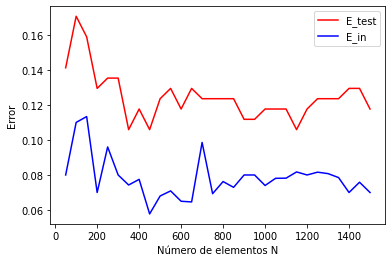

In [ ]:
print('\033[1mFIG 10.2: CURVAS DE APRENDIZAJE\033[0m')

plt.plot(point,ErroresTest,c='red',label='E_test')
plt.plot(point,ErroresIn,c='blue',label = 'E_in')
plt.legend()
plt.xlabel('Número de elementos N')
plt.ylabel('Error')




<font color=red size=5>11. Argumente que se ha obtenido la mejor de las posibles soluciones para la muestra dada.
Argumentar en términos de los errores de ajuste y generalización.</font>

Se puede considerar que la solución es la mejor de las posibles gracias a que su función de perdida busca el hiperplano con máximo anchura entre clases. Podemos ver como en la figura 11.1 como a partir de ciertas iteraciones, el error queda constantes ya que el propio modelo evita el sobreajuste por naturaleza.

In [ ]:
mejorScore = 100.0
ErroresIn = []
ErroresTest = []
point = []

for i in np.arange(10, 10000, 200):
    svm = SVC(max_iter=i,gamma='auto',class_weight='balanced',kernel='poly') 
    svm.fit(X_train, y_train)
    point.append(i)
    score = 1 - svm.score(X_test,y_test)
    ErroresIn.append(1 - svm.score(X_train,y_train))
    ErroresTest.append(score)
    if score < mejorScore:
      mejorModelo = svm
      mejorScore = score
    


FIG 11.1: EARLY-STOPPING


Text(0, 0.5, 'Error')

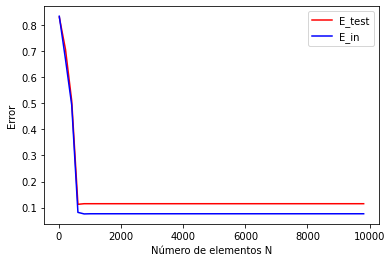

In [ ]:
print('\033[1mFIG 11.1: EARLY-STOPPING\033[0m')

plt.plot(point,ErroresTest,c='red',label='E_test')
plt.plot(point,ErroresIn,c='blue',label = 'E_in')
plt.legend()
plt.xlabel('Número de elementos N')
plt.ylabel('Error')